# Telecom Customer Churn Prediction Project

### Kaggle Dataset link : https://www.kaggle.com/blastchar/telco-customer-churn

## Description of columns:

1. Customer Id
2. Gender - Whether the customer is a male or a female
3. SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
4. Partner - Whether the customer has a partner or not (Yes, No)
5. Dependents - Whether the customer has dependents or not (Yes, No)
6. Tenure - Number of months the customer has stayed with the company
7. PhoneService - Whether the customer has a phone service or not (Yes, No)
8. MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract - The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges - The amount charged to the customer monthly
20. TotalCharges - The total amount charged to the customer
21. Churn - Whether the customer churned or not (Yes or No)


In [21]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To ignore warnings
import warnings
warnings.simplefilter('ignore')

In [22]:
%matplotlib inline

In [23]:
df=pd.read_csv(r'Telco-Customer-Churn.csv')

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Shape of the dataset
df.shape

(7043, 21)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
## For now lets drop 'customerID' column as it won't help us in analysing the dataset.

In [28]:
df.drop(['customerID'],axis=1,inplace=True)

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
#Checking the null values.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### We can see that there isn't any null values present in preliminary search.
### Lets confirm it by checking out the unique values present in all object datatype columns. 

In [31]:
### Retriving the column names whose datatype is 'object'.

list(df.select_dtypes(['O']))

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

### Here we can see that the datatype of 'total charges' column has been taken as an object while its clearly been mentioned that its a continous column.


### So lets convert the 'total charges' column into a numeric column.

In [32]:
#Converting 'total changes' column into numeric column. 
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

### By doing the above converstion we converted any strings into a null value. Now lets check the null values again.  

In [33]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
df.shape

(7043, 20)

### Here we can clearly see that 'total charges' column has 11 null values. Lets drop those null values.

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(7032, 20)

# Exploratory Data Analysis

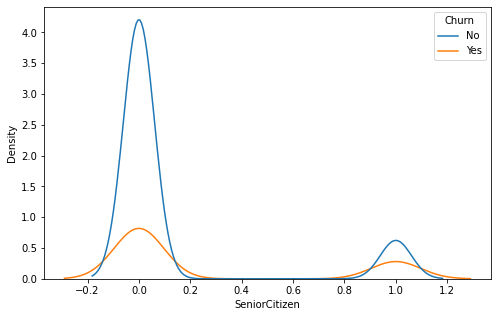

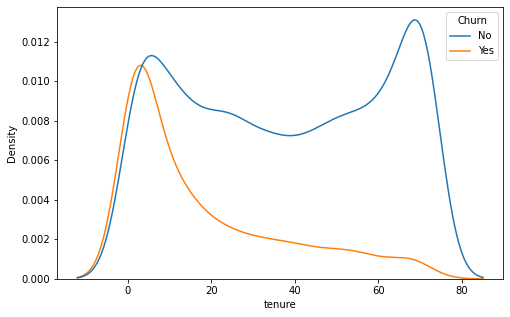

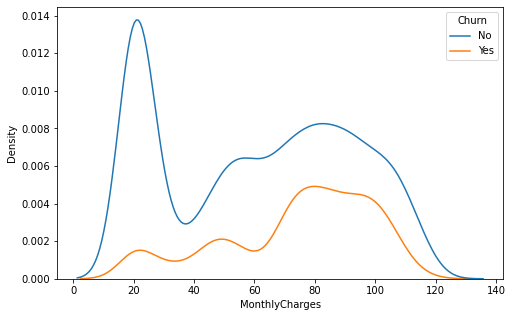

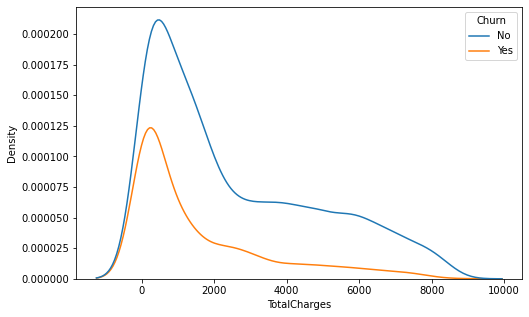

In [37]:
for i in list(df.select_dtypes('number')):
    plt.figure(figsize=(8,5))
    sns.kdeplot(x=df[i],hue=df['Churn'])
    plt.show()

### Observations using KDEplot:
1.From tenure kde plot we can say that equal number of people have both churned and not churned at the beginning. As time progressed there is a decrease in churn. This could be because they would have settled in the same services.

2.From monthly charges kde plot we can say that for a less monthly charges many people haven't churned the services. But when the monthly charges is increased to around 60 to 80 there is a slight increase in churn but later this also decreases.

3.From total charges kde plot we can depict that initally with higher total charges the churn percentage is on a higher side but as the total charges increases this trend dereases. Mostly the services provided by the company would be good when total charges is paid on whole.

No     51.749147
Yes    48.250853
Name: Partner, dtype: float64


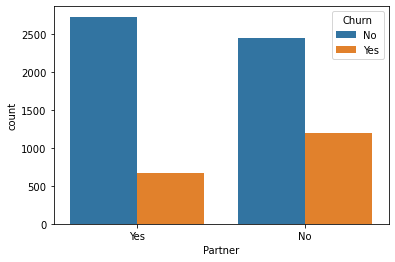

--------------
No     70.150739
Yes    29.849261
Name: Dependents, dtype: float64


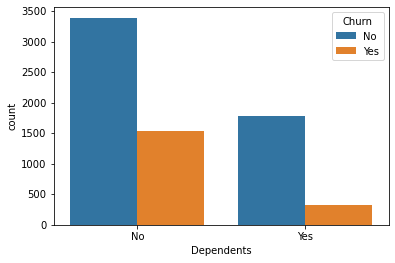

In [38]:
sns.countplot(x=df.Partner,hue=df.Churn)
print(df.Partner.value_counts()/df.shape[0]*100)
plt.show()
print('--------------')
sns.countplot(x=df.Dependents,hue=df.Churn)
print(df.Dependents.value_counts()/df.shape[0]*100)
plt.show()

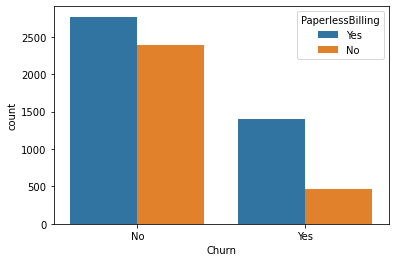

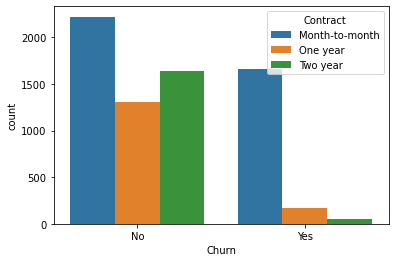

In [39]:
sns.countplot(x=df.Churn,hue=df.PaperlessBilling)
plt.show()
# plt.figure(figsize=(8,5))
sns.countplot(x=df.Churn,hue=df.Contract)
plt.show()

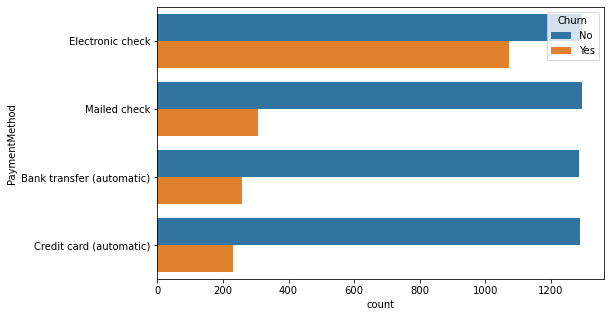

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(y=df.PaymentMethod,hue=df.Churn)
plt.show()

In [41]:
d=list(df.select_dtypes(['O']).columns)
d.pop(15)
d

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

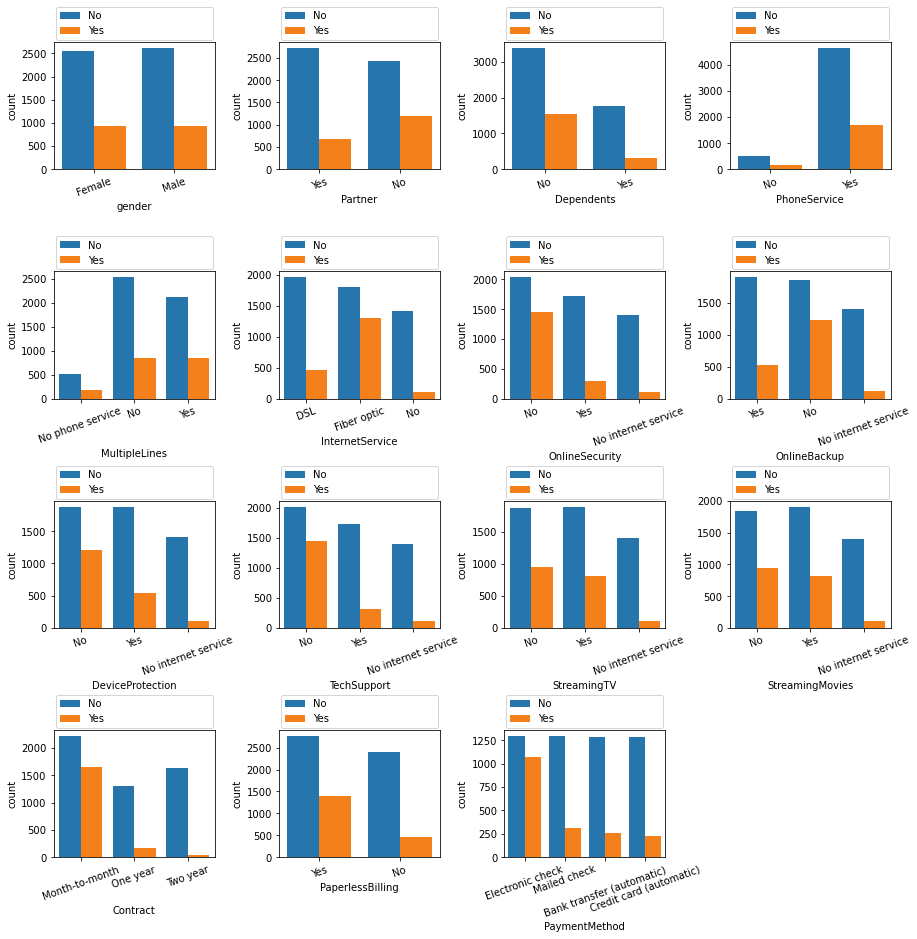

In [42]:
### Plotting all the categorical variables in subplots. 

fig=plt.figure(figsize=(15,15))

a=4    ### Number of rows of subplot
b=4    ### Number of columns of subplot
c=1    ### The value of index of subplot
for i in d:  ### Iterating through each subplots
    plt.subplot(a,b,c)
    sns.countplot(x=df[i],hue=df.Churn,saturation=0.9)
    plt.xticks(rotation=20)
    plt.legend(bbox_to_anchor = (0. , 1. , 1. , .1) , loc = 3 , mode = 'expand' , borderaxespad = 0.2)
    c=c+1
fig.subplots_adjust(hspace =0.8,wspace=0.4) ### Adjusting the gap b/w the subplots
plt.show()

# Data Transformation and Feature Selection

In [43]:
### Retriving the column names whose datatype is 'object' again.

object_dtype_columns = list(df.select_dtypes(['O']))
print((object_dtype_columns))

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [44]:
for i in object_dtype_columns:
    print(i)
    print(list(df[i].unique()))
    print()

gender
['Female', 'Male']

Partner
['Yes', 'No']

Dependents
['No', 'Yes']

PhoneService
['No', 'Yes']

MultipleLines
['No phone service', 'No', 'Yes']

InternetService
['DSL', 'Fiber optic', 'No']

OnlineSecurity
['No', 'Yes', 'No internet service']

OnlineBackup
['Yes', 'No', 'No internet service']

DeviceProtection
['No', 'Yes', 'No internet service']

TechSupport
['No', 'Yes', 'No internet service']

StreamingTV
['No', 'Yes', 'No internet service']

StreamingMovies
['No', 'Yes', 'No internet service']

Contract
['Month-to-month', 'One year', 'Two year']

PaperlessBilling
['Yes', 'No']

PaymentMethod
['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

Churn
['No', 'Yes']



In [45]:
list(df.select_dtypes('number'))

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [46]:
### Checking the number of unique values present in each object type columns.  

a=[]
for i in object_dtype_columns:
    print(i)
    print("Unique Values= ",len(df[i].unique()))
    a.append(len(df[i].unique()))
    print('---------')
print("Total sum of unique values= ",sum(a))

gender
Unique Values=  2
---------
Partner
Unique Values=  2
---------
Dependents
Unique Values=  2
---------
PhoneService
Unique Values=  2
---------
MultipleLines
Unique Values=  3
---------
InternetService
Unique Values=  3
---------
OnlineSecurity
Unique Values=  3
---------
OnlineBackup
Unique Values=  3
---------
DeviceProtection
Unique Values=  3
---------
TechSupport
Unique Values=  3
---------
StreamingTV
Unique Values=  3
---------
StreamingMovies
Unique Values=  3
---------
Contract
Unique Values=  3
---------
PaperlessBilling
Unique Values=  2
---------
PaymentMethod
Unique Values=  4
---------
Churn
Unique Values=  2
---------
Total sum of unique values=  43


### Here if one hot encoding is used then 43 new columns would be created. This could lead to the curse of dimensionality.
### Hence lets use mean encoding and label encoding and change the categorical variables into numerical variables for each respectively.

## Mean Encoding

In [47]:
df1=df.copy()

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [49]:
# Encoding the dependent variable 'Churn' for Mean Encoding.

df1.Churn=df1.Churn.map({'No':0,'Yes':1})

In [50]:
### Defining Mean Encoding.

def Mean_encoding(df,datacolumn,target):
    mean_ordinal=df.groupby(datacolumn)[target].mean().to_dict()
    df['mean_encode '+datacolumn]=df[datacolumn].map(mean_ordinal)
    df=df.drop(datacolumn,axis=1) 
    return df

In [51]:
object_dtype_columns = list(df1.select_dtypes(['O']))

In [52]:
### Using Mean Encoding to replace the values of object datatype columns into float datatype.

for i in object_dtype_columns:
    df1=Mean_encoding(df1,i,'Churn')

In [53]:
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,mean_encode gender,mean_encode Partner,mean_encode Dependents,mean_encode PhoneService,mean_encode MultipleLines,mean_encode InternetService,mean_encode OnlineSecurity,mean_encode OnlineBackup,mean_encode DeviceProtection,mean_encode TechSupport,mean_encode StreamingTV,mean_encode StreamingMovies,mean_encode Contract,mean_encode PaperlessBilling,mean_encode PaymentMethod
0,0,1,29.85,29.85,0,0.269595,0.197171,0.312791,0.250000,0.250000,0.189983,0.417787,0.215670,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.452854
1,0,34,56.95,1889.50,0,0.262046,0.329761,0.312791,0.267475,0.250812,0.189983,0.146402,0.399417,0.225393,0.416475,0.335351,0.337289,0.112772,0.163757,0.192020
2,0,2,53.85,108.15,1,0.262046,0.329761,0.312791,0.267475,0.250812,0.189983,0.146402,0.215670,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.192020
3,0,45,42.30,1840.75,0,0.262046,0.329761,0.312791,0.250000,0.250000,0.189983,0.146402,0.399417,0.225393,0.151961,0.335351,0.337289,0.112772,0.163757,0.167315
4,0,2,70.70,151.65,1,0.269595,0.329761,0.312791,0.267475,0.250812,0.418928,0.417787,0.399417,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.452854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0.262046,0.197171,0.155312,0.267475,0.286485,0.189983,0.146402,0.399417,0.225393,0.151961,0.301147,0.299524,0.112772,0.335893,0.192020
7039,0,72,103.20,7362.90,0,0.269595,0.197171,0.155312,0.267475,0.286485,0.418928,0.417787,0.215670,0.225393,0.416475,0.301147,0.299524,0.112772,0.335893,0.152531
7040,0,11,29.60,346.45,0,0.269595,0.197171,0.155312,0.250000,0.250000,0.189983,0.146402,0.399417,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.452854
7041,1,4,74.40,306.60,1,0.262046,0.197171,0.312791,0.267475,0.286485,0.418928,0.417787,0.399417,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.192020


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SeniorCitizen                 7032 non-null   int64  
 1   tenure                        7032 non-null   int64  
 2   MonthlyCharges                7032 non-null   float64
 3   TotalCharges                  7032 non-null   float64
 4   Churn                         7032 non-null   int64  
 5   mean_encode gender            7032 non-null   float64
 6   mean_encode Partner           7032 non-null   float64
 7   mean_encode Dependents        7032 non-null   float64
 8   mean_encode PhoneService      7032 non-null   float64
 9   mean_encode MultipleLines     7032 non-null   float64
 10  mean_encode InternetService   7032 non-null   float64
 11  mean_encode OnlineSecurity    7032 non-null   float64
 12  mean_encode OnlineBackup      7032 non-null   float64
 13  mea

In [55]:
#df.SeniorCitizen=pd.Categorical(df.SeniorCitizen)

### Now lets check whether the dataset is balanced or not.

In [56]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [57]:
print(df1.Churn.value_counts()/df1.shape[0]*100)

0    73.421502
1    26.578498
Name: Churn, dtype: float64


### Here we can clearly see that the dataset is highly imbalanced.
### Hence lets adopt the over sampling technique to convert this imbalanced dataset into a balanced one.
### Lets first split the dataset into churned and not churned.

In [58]:
churned=df1[df1.Churn==1]
not_churned=df1[df1.Churn==0]

In [59]:
churned.shape,not_churned.shape

((1869, 20), (5163, 20))

In [60]:
X=df1.drop(['Churn'],axis=1)
y=df1['Churn']

In [61]:
### Using imblearn library to convert the imbalanced dataset into balanced one. 

from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [62]:
X_res.shape,y_res.shape

((9320, 19), (9320,))

In [63]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Reshaped dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5163, 1: 1869})
Reshaped dataset shape Counter({0: 4660, 1: 4660})


### Now we can see that the dataset has been balanced.

In [64]:
df1=pd.concat([X_res,y_res],axis=1)

In [65]:
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,mean_encode gender,mean_encode Partner,mean_encode Dependents,mean_encode PhoneService,mean_encode MultipleLines,mean_encode InternetService,mean_encode OnlineSecurity,mean_encode OnlineBackup,mean_encode DeviceProtection,mean_encode TechSupport,mean_encode StreamingTV,mean_encode StreamingMovies,mean_encode Contract,mean_encode PaperlessBilling,mean_encode PaymentMethod,Churn
0,0,1,29.850000,29.850000,0.269595,0.197171,0.312791,0.250000,0.250000,0.189983,0.417787,0.215670,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.452854,0
1,0,34,56.950000,1889.500000,0.262046,0.329761,0.312791,0.267475,0.250812,0.189983,0.146402,0.399417,0.225393,0.416475,0.335351,0.337289,0.112772,0.163757,0.192020,0
2,0,2,53.850000,108.150000,0.262046,0.329761,0.312791,0.267475,0.250812,0.189983,0.146402,0.215670,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.192020,1
3,0,45,42.300000,1840.750000,0.262046,0.329761,0.312791,0.250000,0.250000,0.189983,0.146402,0.399417,0.225393,0.151961,0.335351,0.337289,0.112772,0.163757,0.167315,0
4,0,2,70.700000,151.650000,0.269595,0.329761,0.312791,0.267475,0.250812,0.418928,0.417787,0.399417,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.452854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,1,55,101.006833,5509.586153,0.269595,0.329761,0.312791,0.267475,0.286485,0.418928,0.417787,0.360469,0.225393,0.416475,0.301147,0.299524,0.112772,0.335893,0.392330,1
9316,0,11,91.908973,1118.784208,0.269595,0.329761,0.312791,0.267475,0.261415,0.418928,0.417787,0.270282,0.391403,0.416475,0.311313,0.299524,0.427097,0.335893,0.452854,1
9317,0,5,20.584202,126.728133,0.263070,0.215153,0.312791,0.265105,0.250702,0.090026,0.120922,0.093510,0.117344,0.120744,0.109742,0.110005,0.427097,0.163757,0.227396,1
9318,0,2,78.950982,153.238826,0.268496,0.329761,0.312791,0.267475,0.256007,0.418928,0.417787,0.399417,0.391403,0.416475,0.306128,0.337289,0.427097,0.335893,0.192020,1


# Label Encoding

In [66]:
df2=df.copy()

In [67]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [68]:
## Using Label Encoding
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

# Encoding labels  
for i in list(df2.select_dtypes(['O']).columns):
    df2[i]= label_encoder.fit_transform(df2[i])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


## Lets again balance the dataset

In [69]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [70]:
print(df2.Churn.value_counts()/df2.shape[0]*100)

0    73.421502
1    26.578498
Name: Churn, dtype: float64


In [71]:
churned=df2[df2.Churn==1]
not_churned=df2[df2.Churn==0]

In [72]:
churned.shape,not_churned.shape

((1869, 20), (5163, 20))

In [73]:
X=df2.drop(['Churn'],axis=1)
y=df2['Churn']

In [74]:
### Using imblearn library to convert the imbalanced dataset into balanced one. 

from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [75]:
X_res.shape,y_res.shape

((9566, 19), (9566,))

In [76]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Reshaped dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5163, 1: 1869})
Reshaped dataset shape Counter({0: 4783, 1: 4783})


### Now we can see that the dataset has been balanced.

In [77]:
df2=pd.concat([X_res,y_res],axis=1)

In [78]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.950000,1889.500000,0
1,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.850000,108.150000,1
2,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.300000,1840.750000,0
3,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.700000,151.650000,1
4,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.650000,820.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,0,1,0,0,55,1,2,1,0,0,2,0,2,2,1,1,1,101.006833,5509.586153,1
9562,0,0,0,0,11,1,0,1,0,1,0,0,1,2,0,1,2,91.908973,1118.784208,1
9563,0,0,0,0,5,0,0,1,0,1,0,0,0,0,0,0,2,20.584202,126.728133,1
9564,0,0,0,0,2,1,0,1,0,0,0,0,2,0,0,1,2,79.730096,151.731569,1


<AxesSubplot:>

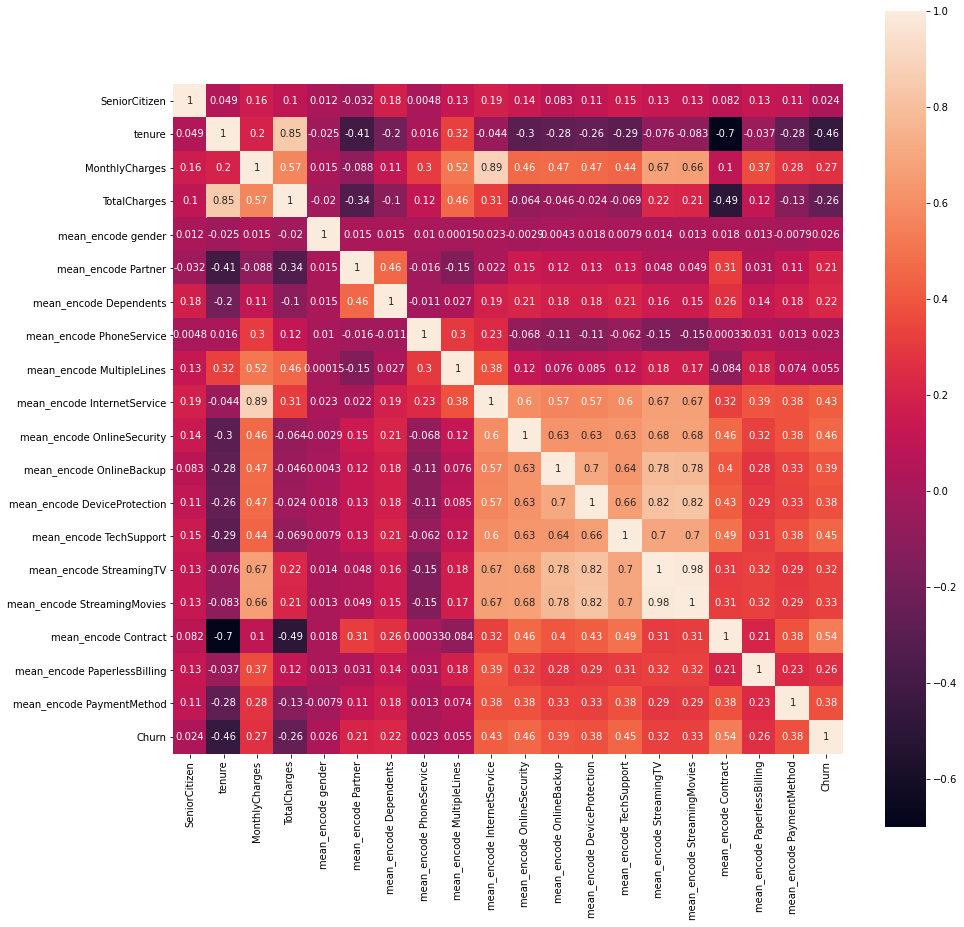

In [79]:
### Checking the correlation of independent variables with the dependent variable for the mean encoded dataset.

plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,square=True)

<AxesSubplot:>

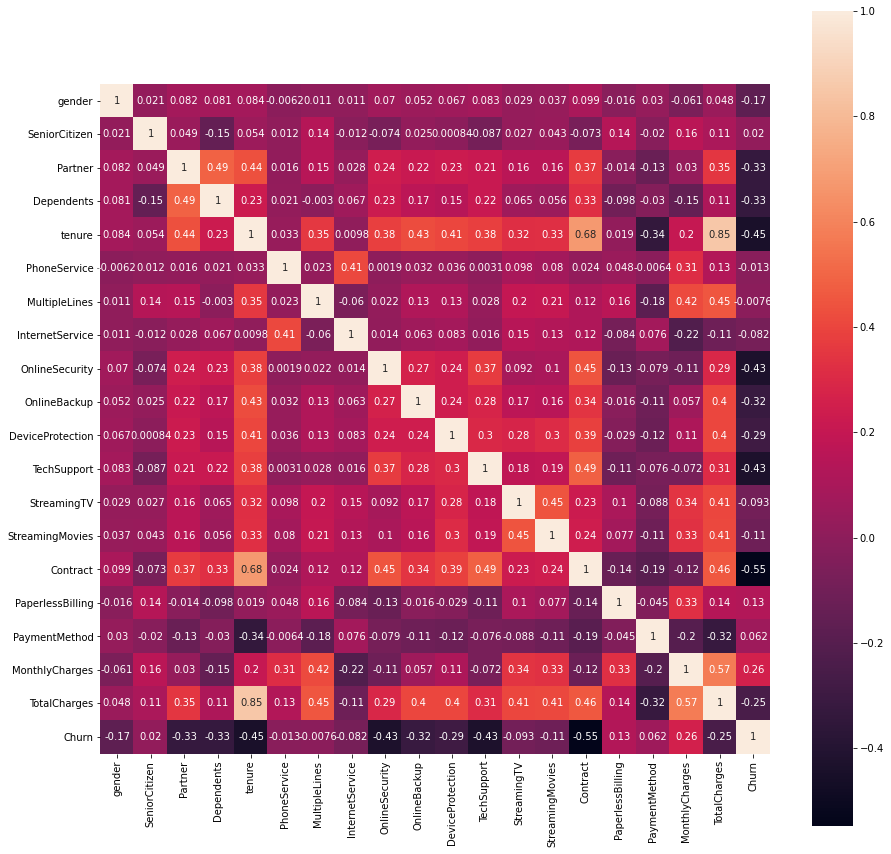

In [80]:
### Checking the correlation of independent variables with the dependent variable for the label encoded dataset.

plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,square=True)

# Model Selection

## Logistic Regression 

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
### Taking the mean encoded dataset

In [229]:
### Splitting the mean encoded dataset into dependent and independent variables.

X_mean=df1.drop(['Churn'],axis=1)
y_mean=df1['Churn']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size = 0.30,random_state=42)
mean_model_log = LogisticRegression(max_iter=1000,random_state=42)
mean_model_log.fit(X_train, y_train)
y_pred = mean_model_log.predict(X_test)

mean_logistic_score=accuracy_score(y_test, y_pred)
print('The accuracy score using mean encoded dataset is =',mean_logistic_score)

The accuracy score using mean encoded dataset is = 0.7854077253218884


In [231]:
### Checking whether the dataset is overfitting or not.

y_pred_train=mean_model_log.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.7930717351318209


In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1414
           1       0.77      0.81      0.79      1382

    accuracy                           0.79      2796
   macro avg       0.79      0.79      0.79      2796
weighted avg       0.79      0.79      0.79      2796



In [233]:
print(confusion_matrix(y_test, y_pred))

[[1074  340]
 [ 260 1122]]


In [234]:
from sklearn.metrics import plot_roc_curve

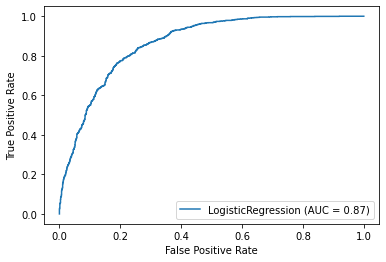

In [235]:
### Plotting an ROC Curve
plot_roc_curve(estimator=mean_model_log,X=X_test,y=y_test)

In [364]:
mean_logistic_AUC = 0.87

In [ ]:
### Taking the label encoded dataset

In [236]:
### Splitting the label encoded dataset into dependent and independent variables.

X_label=df2.drop(['Churn'],axis=1)
y_label=df2['Churn']

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size = 0.20,random_state=42)
label_model_log = LogisticRegression(max_iter=1000,random_state=42)
label_model_log.fit(X_train, y_train)
y_pred = label_model_log.predict(X_test)

In [238]:
label_logistic_score=accuracy_score(y_test, y_pred)
label_logistic_score

0.8254963427377221

In [239]:
### Checking whether the dataset is overfitting or not.

y_pred_train=label_model_log.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8233141662310507


In [240]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       992
           1       0.79      0.86      0.83       922

    accuracy                           0.83      1914
   macro avg       0.83      0.83      0.83      1914
weighted avg       0.83      0.83      0.83      1914



In [241]:
print(confusion_matrix(y_test, y_pred))

[[783 209]
 [125 797]]


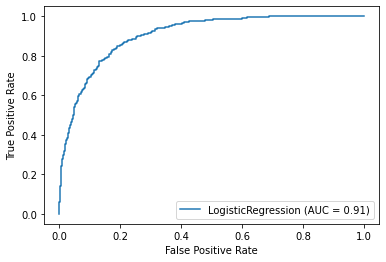

In [242]:
### Plotting ROC curve
plot_roc_curve(estimator=label_model_log,X=X_test,y=y_test)

In [365]:
label_logistic_AUC = 0.91

### Here also by comparing the above 2 accuracy scores we can say that the model is not overfitting.
### Another observation is that when label encoding is used the accuracy value and the Area Under Curve(AUC) has been increased. 

# Decision Tree

## Applying GridsearchCV to find the best parameters for the dataset

In [243]:
### For the mean encoded dataset.

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size = 0.30,random_state=42)

In [245]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [246]:
clf=DecisionTreeClassifier(random_state=42)

parameters=[{'max_depth':[1,2,3,4,5,6,7,8,9,10],'criterion':['gini']},
           {'max_depth':[1,2,3,4,5,6,7,8,9,10],'criterion':['entropy']}]
grid_search=GridSearchCV(estimator=clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1,return_train_score=True)

grid_search=grid_search.fit(X_train,y_train)

In [247]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [248]:
grid_search.best_score_

0.8458006463796165

In [249]:
mean_model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=42)
mean_model_dt.fit(X_train,y_train)
y_pred=mean_model_dt.predict(X_test)

mean_decision_tree_score=accuracy_score(y_test,y_pred)
mean_decision_tree_score

0.8283261802575107

In [250]:
### Checking whether the dataset is overfitting or not.

y_pred_train=mean_model_dt.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8480993255671367


In [251]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1414
           1       0.81      0.85      0.83      1382

    accuracy                           0.83      2796
   macro avg       0.83      0.83      0.83      2796
weighted avg       0.83      0.83      0.83      2796



In [252]:
print(confusion_matrix(y_test, y_pred))

[[1135  279]
 [ 201 1181]]


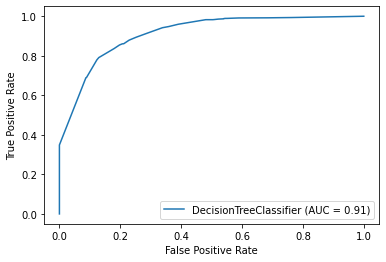

In [253]:
### Plotting ROC curve
plot_roc_curve(estimator=mean_model_dt,X=X_test,y=y_test)

In [366]:
mean_dt_AUC = 0.91

In [254]:
### For the label encoded dataset.

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size = 0.30,random_state=42)

In [256]:
clf=DecisionTreeClassifier(random_state=42)

parameters=[{'max_depth':[1,2,3,4,5,6,7,8,9,10],'criterion':['gini','entropy']}]
grid_search=GridSearchCV(estimator=clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1,return_train_score=True)

grid_search=grid_search.fit(X_train,y_train)

In [257]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [258]:
grid_search.best_score_

0.821387903531669

In [259]:
label_model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=42)
label_model_dt.fit(X_train,y_train)
y_pred=label_model_dt.predict(X_test)

label_decision_tree_score=accuracy_score(y_test,y_pred)
label_decision_tree_score

0.8181184668989547

In [260]:
### Checking whether the dataset is overfitting or not.

y_pred_train=label_model_dt.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8705197132616488


In [261]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1458
           1       0.80      0.84      0.82      1412

    accuracy                           0.82      2870
   macro avg       0.82      0.82      0.82      2870
weighted avg       0.82      0.82      0.82      2870



In [262]:
print(confusion_matrix(y_test, y_pred))

[[1157  301]
 [ 221 1191]]


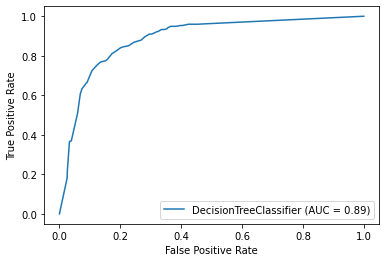

In [263]:
### Plotting ROC curve
plot_roc_curve(estimator=label_model_dt,X=X_test,y=y_test)

In [367]:
label_dt_AUC = 0.89

## Observations:

1. The AUC is 0.91 incase of mean encoded dataset and is 0.89 in label encoded dataset.
2. The accuracy score for the mean encoded dataset is slightly lower when compared with the label encoded dataset.

# Random Forest  

In [264]:
### For the label encoded dataset.

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size = 0.30,random_state=42)

In [266]:
from sklearn.ensemble import RandomForestClassifier

In [267]:
clf=RandomForestClassifier(random_state=42)

parameters=[{'max_depth':[1,2,3,4,5,6,7,8,9,10],'n_estimators':[20,40,60,80,100],
             'criterion':['gini','entropy']}
           ]
grid_search=GridSearchCV(estimator=clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1,return_train_score=True)

grid_search=grid_search.fit(X_train,y_train)

In [268]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 60}

In [269]:
grid_search.best_score_

0.8515567900408272

In [272]:
label_model_rf = RandomForestClassifier (max_depth=9,n_estimators=60,random_state=42,criterion='gini')
label_model_rf.fit(X_train,y_train)
y_pred=label_model_rf.predict(X_test)
label_rf_score=accuracy_score(y_test,y_pred)
label_rf_score

0.8609756097560975

In [273]:
### Checking whether the dataset is overfitting or not.

y_pred_train=label_model_rf.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8969534050179212


In [274]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1458
           1       0.84      0.89      0.86      1412

    accuracy                           0.86      2870
   macro avg       0.86      0.86      0.86      2870
weighted avg       0.86      0.86      0.86      2870



In [275]:
print(confusion_matrix(y_test, y_pred))

[[1214  244]
 [ 155 1257]]


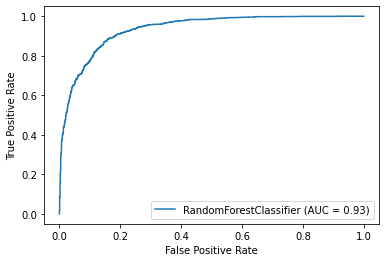

In [276]:
### Plotting ROC curve
plot_roc_curve(estimator=label_model_rf,X=X_test,y=y_test)

In [368]:
label_rf_AUC = 0.93

In [277]:
### For the mean encoded dataset.

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size = 0.30,random_state=42)

In [279]:
### Applying Grid SearchCV
clf=RandomForestClassifier(random_state=42)

parameters=[{'max_depth':[1,2,3,4,5,6,7,8,9,10],'n_estimators':[20,40,60,80,100],
             'criterion':['gini','entropy']}
           ]
grid_search=GridSearchCV(estimator=clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1,return_train_score=True)

grid_search=grid_search.fit(X_train,y_train)

In [280]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [281]:
grid_search.best_score_

0.8749246047031634

In [284]:
mean_model_rf = RandomForestClassifier (max_depth=10,n_estimators=100,random_state=42,criterion='entropy')
mean_model_rf.fit(X_train,y_train)
y_pred=mean_model_rf.predict(X_test)
mean_rf_score=accuracy_score(y_test,y_pred)
mean_rf_score

0.8655221745350501

In [285]:
### Checking whether the dataset is overfitting or not.

y_pred_train=mean_model_rf.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.9227467811158798


In [286]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1414
           1       0.85      0.88      0.87      1382

    accuracy                           0.87      2796
   macro avg       0.87      0.87      0.87      2796
weighted avg       0.87      0.87      0.87      2796



In [287]:
print(confusion_matrix(y_test, y_pred))

[[1206  208]
 [ 168 1214]]


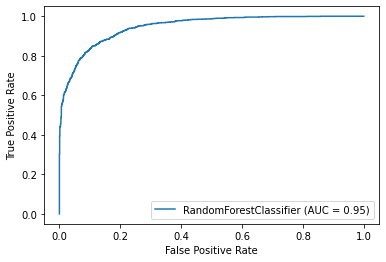

In [288]:
### Plotting ROC curve
plot_roc_curve(estimator=mean_model_rf,X=X_test,y=y_test)

In [369]:
mean_rf_AUC = 0.95

# Observations:
1. It is seen that the AUC when mean encoded dataset is 0.95 whereas for label encoded dataset is 0.93.
2. The accuracy value for both label and mean encoded dataset is around 86%.

# Support Vector Classifier (SVM)

In [289]:
from sklearn.svm import SVC

In [290]:
### For the label encoded dataset.

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size = 0.30,random_state=42)

In [292]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [293]:
e=[]
for i in ['rbf','linear','poly','sigmoid']:
        label_model_svc=SVC(random_state=42,C=1,kernel=i)
        label_model_svc.fit(X_train_std,y_train)
        y_pred_std=label_model_svc.predict(X_test_std)
        label_svc_score=accuracy_score(y_test,y_pred_std)
        e.append(label_svc_score)
        print('gamma= ',j)
        print('kernel=',i)
        print(label_svc_score)
        print()
print("Accuracy value= ",max(e))

gamma=  auto
kernel= rbf
0.840418118466899

gamma=  auto
kernel= linear
0.8271777003484321

gamma=  auto
kernel= poly
0.8181184668989547

gamma=  auto
kernel= sigmoid
0.743205574912892

Accuracy value=  0.840418118466899


In [294]:
### From above we can see that rbf kernel has highest accuracy value.

label_model_svc=SVC(random_state=42,C=1,kernel='rbf')
label_model_svc.fit(X_train_std,y_train)
y_pred_std=label_model_svc.predict(X_test_std)
label_svc_score=accuracy_score(y_test,y_pred_std)
label_svc_score

0.840418118466899

In [295]:
### Checking whether the dataset is overfitting or not.

y_pred_train=label_model_svc.predict(X_train_std)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8629032258064516


In [296]:
print(classification_report(y_test,y_pred_std))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1458
           1       0.83      0.85      0.84      1412

    accuracy                           0.84      2870
   macro avg       0.84      0.84      0.84      2870
weighted avg       0.84      0.84      0.84      2870



In [297]:
print(confusion_matrix(y_test,y_pred_std))

[[1217  241]
 [ 217 1195]]


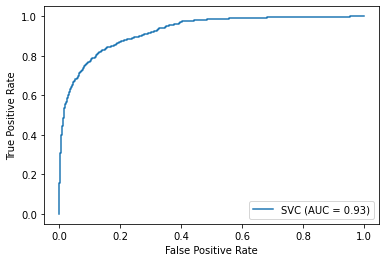

In [298]:
### Plotting ROC curve 
plot_roc_curve(estimator=label_model_svc,X=X_test_std,y=y_test)

In [370]:
label_svc_AUC = 0.93

In [299]:
### For the mean encoded dataset.

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size = 0.30,random_state=42)

In [301]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [302]:
e=[]
for i in ['rbf','linear','poly','sigmoid']:
        mean_model_svc=SVC(random_state=42,C=1,kernel=i)
        mean_model_svc.fit(X_train_std,y_train)
        y_pred_std=mean_model_svc.predict(X_test_std)
        mean_svc_score=accuracy_score(y_test,y_pred_std)
        e.append(mean_svc_score)
        print('gamma= ',j)
        print('kernel=',i)
        print(mean_svc_score)
        print()
print("Highest accuracy value= ",max(e))

gamma=  auto
kernel= rbf
0.8326180257510729

gamma=  auto
kernel= linear
0.7925608011444921

gamma=  auto
kernel= poly
0.7968526466380543

gamma=  auto
kernel= sigmoid
0.73068669527897

Highest accuracy value=  0.8326180257510729


In [303]:
### From above we can see that rbf kernel has highest accuracy value.

mean_model_svc=SVC(random_state=42,C=1,kernel='rbf')
mean_model_svc.fit(X_train_std,y_train)
y_pred_std=mean_model_svc.predict(X_test_std)
mean_svc_score=accuracy_score(y_test,y_pred_std)
mean_svc_score

0.8326180257510729

In [304]:
### Checking whether the dataset is overfitting or not.

y_pred_train=mean_model_svc.predict(X_train_std)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8623543838136113


In [305]:
print(classification_report(y_test,y_pred_std))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1414
           1       0.83      0.82      0.83      1382

    accuracy                           0.83      2796
   macro avg       0.83      0.83      0.83      2796
weighted avg       0.83      0.83      0.83      2796



In [306]:
print(confusion_matrix(y_test,y_pred_std))

[[1188  226]
 [ 242 1140]]


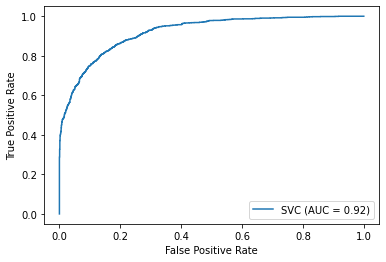

In [307]:
### Plotting ROC curve
plot_roc_curve(estimator=mean_model_svc,X=X_test_std,y=y_test)

In [371]:
mean_svc_AUC = 0.92

# Observations:
1. In both mean and label encoded dataset the rbf kernel has more accuracy value when compared to other kernels.
2. Label encoded dataset has more accuracy score and AUC values when compared to mean encoded dataset.

# Naive Bayes Classifier

In [308]:
from sklearn.naive_bayes import CategoricalNB

In [309]:
### For the label encoded dataset.

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size = 0.30,random_state=42)

In [311]:
e=[]
for i in (list(range(0,11))):
        label_model_NBC = CategoricalNB(alpha=i)
        label_model_NBC.fit(X_train,y_train)
        y_pred=label_model_NBC.predict(X_test)
        label_NBC_score=accuracy_score(y_test,y_pred)
        e.append(label_NBC_score)
        print('Alpha =',i)
        print('Accuracy Value is= ',label_NBC_score)
        print()
print("Highest accuracy value= ",max(e))

Alpha = 0
Accuracy Value is=  0.7477351916376307

Alpha = 1
Accuracy Value is=  0.7993031358885018

Alpha = 2
Accuracy Value is=  0.7996515679442509

Alpha = 3
Accuracy Value is=  0.8

Alpha = 4
Accuracy Value is=  0.8

Alpha = 5
Accuracy Value is=  0.7996515679442509

Alpha = 6
Accuracy Value is=  0.7993031358885018

Alpha = 7
Accuracy Value is=  0.7989547038327526

Alpha = 8
Accuracy Value is=  0.7989547038327526

Alpha = 9
Accuracy Value is=  0.7989547038327526

Alpha = 10
Accuracy Value is=  0.7989547038327526

Highest accuracy value=  0.8


In [312]:
### Choosing alpha = 3

label_model_NBC = CategoricalNB(alpha=3)
label_model_NBC.fit(X_train,y_train)
y_pred=label_model_NBC.predict(X_test)
label_NBC_score=accuracy_score(y_test,y_pred)
print('Accuracy score is= ',label_NBC_score)

Accuracy score is=  0.8


In [313]:
### Checking whether the dataset is overfitting or not.

y_pred_train=label_model_NBC.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.7994324970131422


In [314]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1458
           1       0.76      0.87      0.81      1412

    accuracy                           0.80      2870
   macro avg       0.81      0.80      0.80      2870
weighted avg       0.81      0.80      0.80      2870



In [315]:
print(confusion_matrix(y_test,y_pred))

[[1070  388]
 [ 186 1226]]


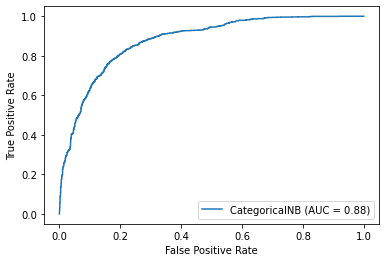

In [316]:
### Plotting ROC curve
plot_roc_curve(estimator=label_model_NBC,X=X_test,y=y_test)

In [372]:
label_NBC_AUC = 0.88

In [317]:
### For the mean encoded dataset.

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size = 0.30,random_state=42)

In [319]:
e=[]
for i in (list(range(0,11))):
        mean_model_NBC = CategoricalNB(alpha=i)
        mean_model_NBC.fit(X_train,y_train)
        y_pred=mean_model_NBC.predict(X_test)
        mean_NBC_score=accuracy_score(y_test,y_pred)
        e.append(mean_NBC_score)
        print('Alpha =',i)
        print('Accuracy Value is= ',mean_NBC_score)
        print()
print("Highest accuracy value= ",max(e))

Alpha = 0
Accuracy Value is=  0.7042203147353362

Alpha = 1
Accuracy Value is=  0.7585836909871244

Alpha = 2
Accuracy Value is=  0.7639484978540773

Alpha = 3
Accuracy Value is=  0.7657367668097281

Alpha = 4
Accuracy Value is=  0.7675250357653791

Alpha = 5
Accuracy Value is=  0.7675250357653791

Alpha = 6
Accuracy Value is=  0.7660944206008584

Alpha = 7
Accuracy Value is=  0.7664520743919886

Alpha = 8
Accuracy Value is=  0.7657367668097281

Alpha = 9
Accuracy Value is=  0.7657367668097281

Alpha = 10
Accuracy Value is=  0.7668097281831188

Highest accuracy value=  0.7675250357653791


In [320]:
### Choosing alpha = 5

mean_model_NBC = CategoricalNB(alpha=5)
mean_model_NBC.fit(X_train,y_train)
y_pred=mean_model_NBC.predict(X_test)
mean_NBC_score=accuracy_score(y_test,y_pred)
print('Accuracy score is= ',mean_NBC_score)

Accuracy score is=  0.7675250357653791


In [321]:
### Checking whether the dataset is overfitting or not.

y_pred_train=mean_model_NBC.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8169834457388105


In [322]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1414
           1       0.73      0.84      0.78      1382

    accuracy                           0.77      2796
   macro avg       0.77      0.77      0.77      2796
weighted avg       0.77      0.77      0.77      2796



In [323]:
print(confusion_matrix(y_test,y_pred))

[[ 986  428]
 [ 222 1160]]


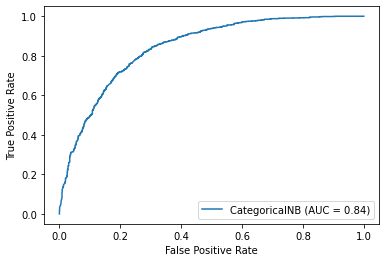

In [324]:
### Plotting ROC curve
plot_roc_curve(estimator=mean_model_NBC,X=X_test,y=y_test)

In [373]:
mean_NBC_AUC = 0.84

# Observations:
1. Label encoded dataset has more accuracy value and AUC when compared with the scores of accuracy and AUC of mean encoded dataset.


# K-Neighbors Classifier

In [325]:
from sklearn.neighbors import KNeighborsClassifier

In [326]:
### For the label encoded dataset.

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size = 0.30,random_state=42)

In [328]:
e=[]
for i in (list(range(1,5))):
        label_model_KNN = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
        label_model_KNN.fit(X_train,y_train)
        y_pred=label_model_KNN.predict(X_test)
        label_KNN_score=accuracy_score(y_test,y_pred)
        e.append(label_KNN_score)
        print('N_neighbors =',i)
        print('Accuracy Value is= ',label_KNN_score)
        print()
print("Highest accuracy value= ",max(e))

N_neighbors = 1
Accuracy Value is=  0.8442508710801394

N_neighbors = 2
Accuracy Value is=  0.810801393728223

N_neighbors = 3
Accuracy Value is=  0.8059233449477352

N_neighbors = 4
Accuracy Value is=  0.8073170731707318

Highest accuracy value=  0.8442508710801394


In [393]:
### Choosing the best accuracy parameters

label_model_KNN = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
label_model_KNN.fit(X_train,y_train)
y_pred=label_model_KNN.predict(X_test)
label_KNN_score=accuracy_score(y_test,y_pred)
label_KNN_score

0.7909407665505227

In [394]:
### Checking whether the dataset is overfitting or not.

y_pred_train=label_model_KNN.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8145161290322581


### I have choosed n_neighbors as 10 to reduce the overfitting. When n_neighbors was 1 the model was highly overfitting.  

In [395]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1458
           1       0.78      0.80      0.79      1412

    accuracy                           0.79      2870
   macro avg       0.79      0.79      0.79      2870
weighted avg       0.79      0.79      0.79      2870



In [396]:
print(confusion_matrix(y_test,y_pred))

[[1134  324]
 [ 276 1136]]


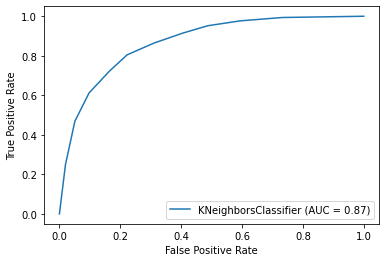

In [397]:
### Plotting ROC curve
plot_roc_curve(estimator=label_model_KNN,X=X_test,y=y_test)

In [398]:
label_KNN_AUC = 0.87

In [334]:
### For the mean encoded dataset.

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size = 0.30,random_state=42)

In [336]:
e=[]
for i in (list(range(1,6))):
        mean_model_KNN = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
        mean_model_KNN.fit(X_train,y_train)
        y_pred=mean_model_KNN.predict(X_test)
        mean_KNN_score=accuracy_score(y_test,y_pred)
        e.append(mean_KNN_score)
        print('N_neighbors =',i)
        print('Accuracy Value is= ',mean_KNN_score)
        print()
print("Highest accuracy value= ",max(e))

N_neighbors = 1
Accuracy Value is=  0.8354792560801144

N_neighbors = 2
Accuracy Value is=  0.7907725321888412

N_neighbors = 3
Accuracy Value is=  0.8043633762517882

N_neighbors = 4
Accuracy Value is=  0.7896995708154506

N_neighbors = 5
Accuracy Value is=  0.7879113018597997

Highest accuracy value=  0.8354792560801144


In [337]:
### Choosing the best accuracy parameters

mean_model_KNN = KNeighborsClassifier(n_neighbors=11,n_jobs=-1)
mean_model_KNN.fit(X_train,y_train)
y_pred=mean_model_KNN.predict(X_test)
mean_KNN_score=accuracy_score(y_test,y_pred)
mean_KNN_score

0.7775393419170243

In [338]:
### Checking whether the dataset is overfitting or not.

y_pred_train=mean_model_KNN.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.8226548129981607


### I have choosed n_neighbors as 11 to reduce the overfitting. When n_neighbors was 1 the model was highly overfitting.  

In [339]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1414
           1       0.75      0.83      0.79      1382

    accuracy                           0.78      2796
   macro avg       0.78      0.78      0.78      2796
weighted avg       0.78      0.78      0.78      2796



In [340]:
print(confusion_matrix(y_test,y_pred))

[[1033  381]
 [ 241 1141]]


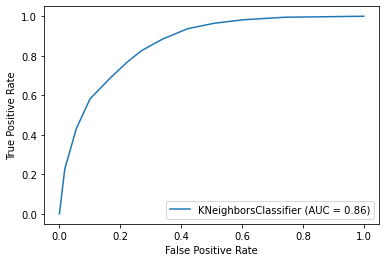

In [341]:
### Plotting ROC curve
plot_roc_curve(estimator=mean_model_KNN,X=X_test,y=y_test)

In [375]:
mean_KNN_AUC = 0.86

# Observations:
1. The accuracy value and AUC of label encoded dataset is more when compared to accuracy value and AUC of mean encoded dataset.
2. The difference of AUC between both the encoded datasets is very less. 

# XGBoost Classifier

In [342]:
from xgboost import XGBClassifier

In [343]:
### For the label encoded dataset.

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size = 0.30,random_state=42)

In [345]:
label_model_XGB=XGBClassifier(n_estimators=1000,random_state=42,learning_rate=0.01,n_jobs=-1)
label_model_XGB.fit(X_train, y_train)
y_pred = label_model_XGB.predict(X_test)
label_XGB_score=accuracy_score(y_test, y_pred)
label_XGB_score

[11:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8651567944250871

In [346]:
### Checking whether the dataset is overfitting or not.

y_pred_train=label_model_XGB.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.9153225806451613


In [347]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1458
           1       0.85      0.88      0.86      1412

    accuracy                           0.87      2870
   macro avg       0.87      0.87      0.87      2870
weighted avg       0.87      0.87      0.87      2870



In [348]:
print(confusion_matrix(y_test,y_pred))

[[1246  212]
 [ 175 1237]]


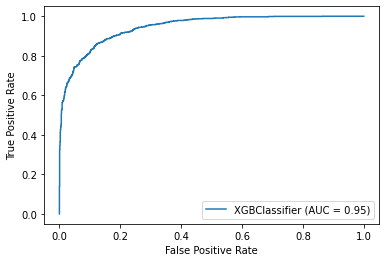

In [349]:
### Plotting ROC curve
plot_roc_curve(estimator=label_model_XGB,X=X_test,y=y_test)

In [399]:
label_XGB_AUC = 0.95

In [350]:
### For the mean encoded dataset.

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size = 0.30,random_state=42)

In [352]:
mean_model_XGB=XGBClassifier(n_estimators=1000,random_state=42,learning_rate=0.01,n_jobs=-1)
mean_model_XGB.fit(X_train, y_train)
y_pred = mean_model_XGB.predict(X_test)
mean_XGB_score=accuracy_score(y_test, y_pred)
mean_XGB_score

[11:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8701716738197425

In [353]:
### Checking whether the dataset is overfitting or not.

y_pred_train=mean_model_XGB.predict(X_train)
print('The accuracy score for the train dataset is = ',accuracy_score(y_train,y_pred_train))

The accuracy score for the train dataset is =  0.923973022685469


In [354]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1414
           1       0.88      0.86      0.87      1382

    accuracy                           0.87      2796
   macro avg       0.87      0.87      0.87      2796
weighted avg       0.87      0.87      0.87      2796



In [355]:
print(confusion_matrix(y_test,y_pred))

[[1248  166]
 [ 197 1185]]


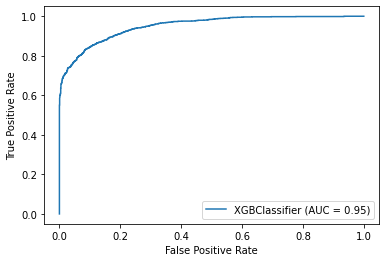

In [356]:
plot_roc_curve(estimator=mean_model_XGB,X=X_test,y=y_test)

In [400]:
mean_XGB_AUC = 0.95

# Conclusions:
1.In mean encoded dataset the accuracy value is found to be slightly higher when compared to the accuracy value of label encoded dataset.

2.But the AUC score is same in both i.e., 0.95

# Summary of all scores

In [403]:
summary_data={'Models':['LogisticReg_Label_Encoded','LogisticReg_Mean_Encoded',
                       'DecisionTree_Label_Encoded','DecisionTree_Mean_Encoded',
                       'RandomForest_Label_Encoded','RandomForest_Mean_Encoded',
                       'SVM_Label_Encoded','SVM_Mean_Encoded',
                       'NaiveBayes_Label_Encoded','NaiveBayes_Mean_Encoded',
                       'KNN_Label_Encoded','KNN_Mean_Encoded',
                       'XGB_Label_Encoded','XGB_Mean_Encoded'],
             'Accuracy Score':[label_logistic_score, mean_logistic_score,
                               label_decision_tree_score, mean_decision_tree_score,
                               label_rf_score, mean_rf_score,
                               label_svc_score, mean_svc_score,
                               label_NBC_score, mean_NBC_score,
                               label_KNN_score, mean_KNN_score,
                               label_XGB_score, mean_XGB_score],
              'AUC Score':[label_logistic_AUC, mean_logistic_AUC,
                          label_dt_AUC, mean_dt_AUC,
                          label_rf_AUC,mean_rf_AUC,
                          label_svc_AUC, mean_svc_AUC,
                          label_NBC_AUC, mean_NBC_AUC,
                          label_KNN_AUC, mean_KNN_AUC,
                          label_XGB_AUC, mean_XGB_AUC]
             }

In [405]:
summary=pd.DataFrame(summary_data)
summary

,Models,Accuracy Score,AUC Score
0,LogisticReg_Label_Encoded,0.825496,0.91
1,LogisticReg_Mean_Encoded,0.785408,0.87
2,DecisionTree_Label_Encoded,0.818118,0.89
3,DecisionTree_Mean_Encoded,0.828326,0.91
4,RandomForest_Label_Encoded,0.860976,0.93
5,RandomForest_Mean_Encoded,0.865522,0.95
6,SVM_Label_Encoded,0.840418,0.93
7,SVM_Mean_Encoded,0.832618,0.92
8,NaiveBayes_Label_Encoded,0.800000,0.88
9,NaiveBayes_Mean_Encoded,0.767525,0.84


### Considering the accuracy score and AUC score the top 2 models are XGB_Mean_Encoded and RandomForest_Mean_Encoded. 
### Hence XGBoost mean encoded model can be used into our deployment phase.

import joblib
joblib.dump(modelname,'goodmodel.pkl')


joblib.load()